# Tarea 2: Backpropagation, descenso de gradiente y entrenamiento <br/> CC6204 Deep Learning, Universidad de Chile  <br/> Hoja de respuestas
## Nombre: 
Fecha de entrega: 4 de octubre de 2021

Para la **corrección automática** hemos creado una funcionalidad nueva que les permite comprobar el tiempo que demora su solución. En colab estos tiempos pueden ser variables entre una ejecución y otra del mismo código. No se preocupen si les falla el test por `time` algunas veces. Pueden hacer `time=0` en la ultima linea de cada test para evitar estos errores. También hemos usado nombres para los tests. Estos pueden serles de ayuda para determinar qué partes de su implementación deben corregir ;-)


In [1]:
# Este notebook está pensado para correr en CoLaboratory. 
# Lo único imprescindible por importar es torch
import torch

# Posiblemenete quieras instalar e importar ipdb para debuggear.
# Si es así, descomenta lo siguiente:
# !pip install -q ipdb
# import ipdb

# Aqui instalamos la libreria de correccion del curso
!pip install -U "git+https://github.com/dccuchile/CC6204.git@master#egg=cc6204&subdirectory=autocorrect"
from timeit import default_timer as timer

  Cloning https://github.com/dccuchile/CC6204.git (to revision master) to /tmp/pip-install-cmeszpz_/cc6204_4e837663b70f4758899565f7ec48a98e
  Running command git clone -q https://github.com/dccuchile/CC6204.git /tmp/pip-install-cmeszpz_/cc6204_4e837663b70f4758899565f7ec48a98e
  Created wheel for cc6204: filename=cc6204-0.5.0-py3-none-any.whl size=5800 sha256=13b1907b02cf38625a95974a22c4d617a763e268fe4b3d6e24e8ded80c240e6f
  Stored in directory: /tmp/pip-ephem-wheel-cache-_dklrn43/wheels/3c/26/f5/2abeb546c3ff1ab6e69113a3ae69bc0ac3442642727fd0dcc2
Successfully built cc6204


In [2]:
# importamos las herramientas del curso
from cc6204 import AutoCorrect, FailedTest

# ingresa el host y port que posteamos en u-cursos
corrector = AutoCorrect(host="cc6204.dcc.uchile.cl", port=443)

# anota el token que te daremos en u-cursos
token = "]ye/Ox;nsz"

Connection stablished


# Parte 1: Preliminares: funciones de activación y función de error


## 1a) Derivando las funciones de activación

Escribe acá tus respuestas para las derivadas de cada función de activación.
<br>

\begin{equation}
\frac{\partial\ \text{relu}(x)}{\partial x} = \begin{cases} 1 & x \geq 0 \\ 0 & x<0 \end{cases} \\
\end{equation}
<br>

\begin{eqnarray}
\frac{\partial\ \text{swish}(x, \beta)}{\partial x} & = 
\frac{\partial\ (x \text{ sig}(\beta x))}{\partial x} & =
\text{sig}(\beta x) + \beta x (\frac{e^{-\beta x} + 1}{(1+e^{-\beta x})^2} - \frac{1}{(1+e^{-\beta x})^2}) &=
\text{sig}(\beta x) + \beta x(\text{sig}(\beta x) - \text{sig}(\beta x)^2) = 
\text{sig}(\beta x)+\beta\text{swish}(x,\beta)(1-\text{sig}(\beta x)) \\
\frac{\partial\ \text{swish}(x, \beta)}{\partial \beta} & =  
\frac{\partial\ (x \text{ sig}(\beta x))}{\partial \beta} & =
x^2(\text{ sig}(\beta x) - \text{ sig}(\beta x)^2) &=
x^2\text{ sig}(\beta x)(1- \text{ sig}(\beta x)) =
\text{swish}(x,\beta)(x-\text{swish}(x,\beta)) \\
\end{eqnarray}
<br>

<!-- \begin{eqnarray}
\frac{\partial\ \text{swish}(x, b)}{\partial x} & = & 
\frac{\partial\ (x \times sig(\beta x))}{\partial x} & = & 
\frac{\partial\ (\frac{x}{1+ e ^{-\beta x}})}{\partial x} & = & 
\frac{(1 + e^{-\beta x}) + \beta x e^{-\beta x}}{(1+e^{-^\beta x})^2} & = &
\frac{1}{1+e^{-\beta x}} +\frac{\beta x e^{-\beta x}}{(1+e^{-\beta x})^2} & = & 
sig(\beta x) + \beta x (\frac{e^{-\beta x} + 1}{(1+e^{-\beta x})^2} - \frac{1}{(1+e^{-\beta x})^2}) & = sig(\beta x) + \beta x(sig(\beta x) - sig(\beta x)^2) & = &
sig(\beta x) + \beta swish(x, b)(1 - sig(\beta x))
\\
\end{eqnarray}
<br>
\begin{eqnarray}
\frac{\partial\ \text{swish}(x, b)}{\partial b} & = &
\frac{\partial\ (x \times sig(\beta x))}{\partial \beta} & = & 
\frac{\partial\ (\frac{x}{1+ e ^{-\beta x}})}{\partial \beta} & = & 
\frac{x^2 e^{-\beta x}}{(1+e^{-\beta x})^2} & = &
\frac{x^2 [e^{-\beta x} + 1 -1]}{(1+e^{-\beta x})^2} & = &
x^2[ \frac{1 + e^{-\beta x}}{(1+e^{-\beta x})^2}  - \frac{1}{(1+e^{-\beta x})^2} ] & = &
x^2(sig(\beta x) - sig(\beta x)^2) &=&
x^2sig(\beta x)(1- sig(\beta x))
\end{eqnarray} -->


\begin{eqnarray}
\frac{\partial\ \text{celu}(x, \alpha)}{\partial x} & = &
\begin{cases} 1 & x \geq 0\\ e^{\frac{x}{\alpha}} & x < 0 \end{cases} \\
\frac{\partial\ \text{celu}(x, \alpha)}{\partial \alpha} & = &
\begin{cases} 0 & x \geq 0\\ (e^{\frac{x}{\alpha}}-1) + \alpha(-1e^{\frac{x}{\alpha}})\frac{x}{\alpha^2} & x < 0 \end{cases} & = 
\begin{cases} 0 & x \geq 0\\ e^{\frac{x}{\alpha}}(1-\frac{x}{\alpha}) - 1 & x < 0 \end{cases} & =
\begin{cases} 0 & x \geq 0\\ \frac{\text{celu}(x,\alpha)-xe^{\frac{x}{\alpha}}}{\alpha} & x < 0 \end{cases} \\
\end{eqnarray}

In [3]:
# Los gradientes se pueden implementar como parte de cada una de las funciones de activación
# En el caso de swish y celu devuelven una tupla (d_dx, d_dp)

def sig(T, gradient=False):
  if gradient:
    sigT = sig(T)
    return sigT * (1 - sigT)
  return torch.reciprocal(1 + torch.exp(-1 * T))
  
def tanh(T, gradient=False):
  if gradient:
    tanhT = tanh(T)
    return 1 - tanhT * tanhT
  E = torch.exp(T)
  e = torch.exp(-1 * T)
  return (E - e) * torch.reciprocal(E + e)

def relu(T, gradient=False):
  if gradient:
    outT = torch.zeros_like(T)
    outT[T>=0] = 1
    return outT
  return torch.max(T, torch.zeros_like(T))

def swish(T, beta=1, gradient=False):
  if gradient:
    sigbT = sig(beta * T)
    swishT = T * sigbT
    return sigbT + beta * swishT * (1 - sigbT), swishT * (T - swishT)
  return T * torch.reciprocal(1 + torch.exp(-beta * T))

def celu(T, alpha=1, gradient=False):
  if alpha == 0:
    raise ValueError("alpha cannot be 0")

  zeros = torch.zeros_like(T)
  Talpha = T / alpha
  
  if gradient:
    e = Talpha.exp()
    d_dx = torch.ones_like(T)
    d_dx[T<0] = e[T<0]
    zeros[T<0] = (celu(T)[T<0] - T[T<0] * e[T<0]) / alpha
    return d_dx, zeros # d_dx, d_da
  
  return torch.max(zeros, T) + torch.min(zeros, alpha * (Talpha).expm1())

def softmax(T, dim, estable=True):
  if estable:
    T -= T.max(dim=dim, keepdim=True)[0]  # keepdim=True => output has dim with size 1. Otherwise, dim is squeezed
  exp = torch.exp(T)
  return exp / torch.sum(exp, dim=dim, keepdim=True)  # keepdim=True => output has dim with size 1. Otherwise, dim is squeezed

## 1b) Entropía Cruzada

In [4]:
# Tu código acá
def CELoss(Q, P, estable=True, epsilon=1e-8):
  # Q y P: representan distribuciones de probabilidad discreta  
  #        (mediante matrices con las mismas dimensiones)
  # estable y epsilon: nos permiten lograr estabilidad numérica cuando 
  #       intentamos computar el logaritmo de valores muy pequeños.
  #       epsilon limitará el valor mínimo del valor original cuando estable=True
  N = Q.shape[0]
  if estable:
    Q = Q.clamp(epsilon, 1-epsilon)
  return -(P * Q.log()).sum()/N

In [5]:
# Tests del API del curso
for test in ['small', 'estable', 'eps', 'no-estable']:
  # Obtengamos dos distribuciones de pdobabilidad y los parametros estable y epsilon
  Q, P, estable, eps = corrector.get_test_data(homework=2, question="1b", test=test, token=token)

  # Corramos tu implementacion de CELoss para ver como se comporta
  s = timer()
  result = CELoss(Q=torch.Tensor(Q), P=torch.Tensor(P), estable=estable, epsilon=eps)
  t = timer() - s

  # Veamos si todo fue OK :)
  corrector.sumbit(homework=2, question="1b", test=test, token=token, answer=result, time=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Old method `sumbit` has been renamed to `submit`, please use that instead.
  if sys.path[0] == '':


Correct Test!
Correct Test!
Correct Test!
Correct Test!


## 1c) Opcional: Entropía Cruzada Categórica

In [6]:
# No es necesario que entregues código en esta parte.
# Pero si quieres, igual hay espacio ;-)

# Parte 2: Más derivadas y back propagation

## 2a) Derivando la última capa

Escribe tu cálculo acá.
<br>

\begin{eqnarray}
\frac{\partial \cal L}{\partial u^{(L+1)}_{ij}} & = & \sum_k \frac{\partial \cal L}{\partial \hat y_{ik}} \frac{\partial \hat y_{ik}}{\partial u^{(L+1)}_{ij}} \\
\end{eqnarray}

primero, calculemos $\frac{\partial \hat y_{ik}}{\partial u^{(L+1)}_{ij}}$

\begin{eqnarray}
\frac{\partial \hat y_{ik}}{\partial u^{(L+1)}_{ij}} & = & \frac{\partial \frac{e^{u^{(L+1)}_{ik}}}{\sum_m e^{u^{(L+1)}_{im}}}}{\partial u^{(L+1)}_{ij}}\\
& = & \begin{cases} \hat y_{ik}(1-\hat y_{ij}) & k = j\\ -\hat y_{ij} \hat y_{ik} & k\neq j \end{cases}
\end{eqnarray}

segundo, calculemos $\frac{\partial \cal L}{\partial \hat y_{ik}}$

\begin{eqnarray}
\frac{\partial \cal L}{\partial \hat y_{ik}} & = & -\frac{1}{N}\frac{\partial \sum_p\sum_q y_{pq} \text{log}(\hat y_{pq})}{\partial \hat y_{ik}} \\
& = & -\frac{1}{N}y_{ik}\frac{1}{\hat y_{ik}}
\end{eqnarray}

Sustituyendo

\begin{eqnarray}
\frac{\partial \cal L}{\partial u^{(L+1)}_{ij}} & = & \frac{1}{N}\left(\sum_{k\neq j} (y_{ik}\hat y_{ij}) - y_{ij} + y_{ij} \hat y_{ij}\right)
& = & \frac{1}{N} (\hat y_{ij} - y_{ij})
\end{eqnarray}

<br>
(No es necesario que repitas el código que era solo de ayuda para chequear las dimensiones.)

## 2b) Derivando la última capa (continuación)

Escribe tus respuestas acá.
<br>

\begin{equation}
\frac{\partial\cal L}{\partial U_{ij}} = \frac{\partial\cal L}{\partial u^{(L+1)}_{kl}} \frac{\partial u^{(L+1)}_{kl}}{\partial U_{ij}} \\
\end{equation}
<br>

donde

\begin{equation}
\frac{\partial u^{(L+1)}_{kl}}{\partial U_{ij}} = \begin{cases} h_{ki} & r=i, l=j \\0 & e.o.c \end{cases}
\end{equation}

luego

\begin{eqnarray}
\frac{\partial\cal L}{\partial U_{ij}} & = & \frac{\partial\cal L}{\partial u^{(L+1)}_{kl}} h_{ki} \\
& = & h^T \frac{\partial\cal L}{\partial u^{(L+1)}}
\end{eqnarray}


\begin{eqnarray}
\frac{\partial\cal L}{\partial c_i} & = & \frac{\partial\cal L}{\partial u^{(L+1)}_{kl}}\frac{\partial u^{(L+1)}_{kl}}{\partial c_i} \\
& = & \frac{\partial\cal L}{\partial u^{(L+1)}_{kl}}
\end{eqnarray}
<br>

\begin{eqnarray}
\frac{\partial\cal L}{\partial h^{(L)}_{ij}} & = & \frac{\partial\cal L}{\partial u^{(L+1)}_{kl}}U_{jl} \\
\end{eqnarray}
<br>
(No es necesario que repitas el código que era solo de ayuda para chequear las dimensiones.)

## 2c) Derivando desde las capas escondidas

Escribe tus respuestas acá. Repite los siguientes cálculos para $\text{relu}, \text{celu}, \text{swish}$
<br>

\begin{equation}
\frac{\partial\cal L}{\partial u^{(k)}} = \frac{\partial \cal L}{\partial h^{(k)}} \cdot \frac{\partial h^{(k)}}{\partial u^{(k)}}\\
\end{equation}
<br>

Recordando que $h^{(k)} = f(u^{(k)})$, siendo $f$ la función de activación para la capa i-ésima, tenemos que lo anterior se puede escribir como:

\begin{equation}
\frac{\partial\cal L}{\partial u^{(k)}} = \frac{\partial \cal L}{\partial h^{(k)}} \cdot f'(u^{(k)})\\
\end{equation}

Los valores de las derivadas de las funciones de activación ($f'(u^{(k)})$) fueron calculados en la parte 1 a) y no se repiten para no ser redundantes.

El resto de las derivadas fueron calculadas en clases y se consideran conocidas ya que se encuentran en Material Docente del curso, por lo que solo se ponen los resultados a continuación:

\begin{equation}
\frac{\partial\cal L}{\partial W^{(k)}} = (h^{(k-1)})^{T}\cdot \frac{\partial \cal L}{\partial u^{(k)}} \\
\end{equation}
<br>

\begin{equation}
\frac{\partial\cal L}{\partial b^{(k)}} = \frac{\partial \cal  L}{\partial u^{(k)}} \cdot \begin{bmatrix}
           1 \\
           1 \\
           \vdots \\
           1\\
           \end{bmatrix} = \text{sum}(\frac{\partial \cal L}{\partial u^{(k)}}, dim=0)
\end{equation}
<br>

\begin{equation}
\frac{\partial\cal L}{\partial h^{(k-1)}} = \frac{\partial \cal L}{\partial u^{(k)}} \cdot (W^{(k)})^{T} \\
\end{equation}
<br>

# Parte 3: Backpropagation en nuestra red

## 3a) Método `backward` + parte 3b) Opcional

In [7]:
# Acá solo deberías programar la función backward.
# El resto del código viene de la Tarea 1 (a menos que hayas programado
# la parte opcional en cuyo caso también deberías cambiar el inicializador).
# Puedes incluir todo el código de la Tarea 1 que quieras.
import torch.nn as nn
from torch.nn import Parameter, ParameterList
import math

def get_init_weights(shape):
  W = torch.randn(shape)
  # stdv = 1. / math.sqrt(W.size(1))
  # W.data.uniform_(-stdv, stdv)
  return Parameter(W)

class FFNN(nn.Module):
  def __init__(self, F, l_h, l_a, C, l_a_params=None):
    super(FFNN, self).__init__()
       
    sizes = [F] + l_h + [C]
    self.Ws = ParameterList([get_init_weights((sizes[i], sizes[i+1])) for i in range(len(sizes)-1)])
    self.bs = ParameterList([Parameter(torch.zeros(h)) for h in sizes[1:]])
    self.fs = l_a
    if l_a_params is not None:
      self.fs_ps_mask = [Parameter(torch.tensor(p)) if p else None for p in l_a_params]
    else:
      self.fs_ps_mask = [None for _ in l_a]
    self.fs_ps = ParameterList([p for p in self.fs_ps_mask if p])
    
  @property
  def in_size(self):
    return self.Ws[0].shape[0]
    
  def load_weights(self, Ws, U, bs, c):
    self.Ws = ParameterList([Parameter(W) for W in Ws + [U]])
    self.bs = ParameterList([Parameter(b) for b in bs + [c]])
  
  def resumen(self):
    # Usa self.parameters() o self.named_parameters().
    for name, p in self.named_parameters():
      print('{}:\t{}'.format(name, p.size()))
    pass
  
  def forward(self, x):
    self.cacheU = [] #, self.cacheH = [], []
    for W, b, f, p in zip(self.Ws[:-1], self.bs[:-1], self.fs, self.fs_ps_mask):
      x = torch.mm(x, W) + b
      self.cacheU.append(x)
      x = f(x, p.item()) if p else f(x)
#       self.cacheH.append(x)
    return softmax(torch.mm(x, self.Ws[-1]) + self.bs[-1], dim=1)
  
  # nuevo código Tarea 2
  def backward(self, x, y, y_pred):
    current_grad = (y_pred - y) / y.size(0)
    
    for i in range(len(self.Ws)-1, 0, -1):
      if self.fs_ps_mask[i-1] is None:
        # funcion de activacion sin parametro
        self.Ws[i].grad = self.fs[i-1](self.cacheU[i-1]).t() @ current_grad
      else:
        # funcion de activacion con parametro
        self.Ws[i].grad = self.fs[i-1](self.cacheU[i-1], self.fs_ps_mask[i-1].item()).t() @ current_grad
      self.bs[i].grad = current_grad.sum(dim=0)
      h_grad = current_grad @ self.Ws[i].t()
      
      if self.fs_ps_mask[i-1] is None:
        # funcion de activacion sin parametro
        current_grad = self.fs[i-1](self.cacheU[i-1], gradient=True) * h_grad
      else:
        # funcion de activacion con parametro
        current_grad, p_grad = self.fs[i-1](self.cacheU[i-1], self.fs_ps_mask[i-1], gradient=True)
        current_grad *= h_grad
        self.fs_ps_mask[i-1].grad = (p_grad * h_grad).sum()
    
    self.Ws[0].grad = x.t() @ current_grad
    self.bs[0].grad = current_grad.sum(dim=0)

In [8]:
# Tests del API del curso
# (estos Tests NO sustituyen al anterior en la verificación de los gradientes)
for test in ['mnist-model']:
  # Obtenemos los parámetos de la red desde el API
  F, l_h, l_a, C, Ws, U, bs, c, X, y = corrector.get_test_data(homework=2, question="3a", test=test, token=token)
  l_a = [f for s in l_a for f in [sig, tanh, relu, celu] if f.__name__ == s]
 
  print([torch.tensor (w).size () for w in Ws])
 
  # Inicializamos modelo con parámetros del API
  your_model = FFNN(F=F, l_h=l_h, l_a=l_a, C=C)
  your_model.load_weights([torch.Tensor(l) for l in Ws], torch.Tensor(U),
                          [torch.Tensor(l) for l in bs], torch.Tensor(c))
  
  # Obtenemos el índice del parámetro Ws[0] en la lista de parámetros de tu modelo
  idx = next(i for i, p in enumerate(your_model.parameters()) if p.size() == torch.Tensor(Ws[1]).size() and torch.all(torch.Tensor(Ws[1])==p))
 
  # Ejecutamos el forward de para input del API
  y_pred = your_model(torch.Tensor(X))
  
  # Corramos el backward de tu modelo para ver como se comporta
  s = timer()
  your_model.backward(torch.Tensor(X), torch.Tensor(y), y_pred)
  t = timer() - s
 
  # Veamos todo fue OK :)
  corrector.sumbit(homework=2, question="3a", test=test, token=token, 
                   answer=list(your_model.parameters())[idx].grad.mean(), time=0)

[torch.Size([784, 32]), torch.Size([32, 16])]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: Old method `sumbit` has been renamed to `submit`, please use that instead.


Correct Test!


## 3c) Opcional: Chequeo de gradiente

In [9]:
# No es necesario que entregues código en esta parte dado 
# que solo es necesario para debuggear que tu implementación está correcta.
# Pero si quieres, igual hay espacio ;-)

# Parte 4: Descenso de gradiente y optimización

## 4a) Descenso de gradiente (estocástico)

In [10]:
# Tu código debiera comenzar así
class SGD():
  def __init__(self, parameters, lr):
    self.params = [p for p in parameters if p is not None]
    self.lr = lr
  
  def step(self):
    for p in self.params:
        p.data -= p.grad * self.lr

In [11]:
# Tests del API del curso
from torch.nn import Parameter
for test in ['small-step', 'big-step', 'random']:
  # Obtengamos una lista de parametros (con gradientes en .grad) 
  # y un valor de learning-rate para probar tu SGD
  ds, gs, lr, idx = corrector.get_test_data(homework=2, question="4a", test=test, token=token)
  parameters = [Parameter(torch.Tensor(d)) for d in ds]
  for p, g in zip(parameters, gs):
    p.grad = torch.Tensor(g)

  # Inicialicemos tu SGD
  optimizer = SGD(parameters, lr)

  # Ejecutemos un paso de tu SGD para ver como se comporta
  s = timer()
  optimizer.step()
  t = timer() - s

  # Veamos si todo fue OK :)
  corrector.sumbit(homework=2, question="4a", test=test, token=token, 
                   answer=parameters[idx].data, time=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Old method `sumbit` has been renamed to `submit`, please use that instead.


Correct Test!
Correct Test!
Correct Test!


## 4b) Datos para carga

In [12]:
from torch.utils.data import Dataset, DataLoader


class RandomDataset(Dataset):
  def __init__(self, N, F, C):
    self.N = N
    self.data = torch.rand(N, F)
    self.targets = torch.randint(0, C, (N,))
  
  def __len__(self):
    return self.N
  
  def __getitem__(self, i):
    return self.data[i], self.targets[i]


class BernuliDataset(Dataset):
  def __init__(self, N, F, C):
    self.N = N
    self.data = torch.bernoulli(torch.rand(N,F))
    self.targets = torch.randint(0, C, (N,))
  
  def __len__(self):
    return self.N
  
  def __getitem__(self, i):
    return self.data[i], self.targets[i]
  

class ToyDataset(Dataset):
  def __init__(self, logic_gate='xor'):
    self.N = 4
    self.data = torch.tensor([[1., 1.], [1.,0.], [0.,1.], [0.,0.]])
    if logic_gate == 'XOR':
      self.targets = torch.tensor([0,1,1,0]) 
    elif logic_gate == 'AND':
      self.targets = torch.tensor([1,0,0,0])
    elif logic_gate == 'OR':
      self.targets = torch.tensor([1,1,1,0])

  def __len__(self):
    return self.N
  
  def __getitem__(self, i):
    return self.data[i], self.targets[i]

In [13]:
# Inicialicemos un RandomDataset de prueba
import random
import numpy as np
N = 1000
F,C=300,random.randint(2,N//2)
your_dataset = RandomDataset(N,F,C)

# Veamos como se comportan __len__ y __getitem__
print("Correct Test!" if len(your_dataset) == N else "Failed Test [len]") 
print("Correct Test!" if type(your_dataset[N//2]) == tuple and len(your_dataset[N//3]) == 2 else "Failed Test [getitem]")

if C >= 2:
  # Veamos como se comporta la distribución de los targets de tu dataset
  targets = your_dataset[:][1].numpy()
  corrects = np.isclose([((targets == c1).sum()+(targets == c2).sum())/2 for c1 in range(C) for c2 in range(c1,C)], N/C, atol=3).sum()
  print("Correct Test!" if corrects/(C*(C-1)/2) > .5 else  "Failed Test [targets]")

Correct Test!
Correct Test!
Correct Test!


## 4c) Optimizando los parámetros de la red para datos al azar

In [14]:
import sys

# Tu código acá
def entrenar_FFNN(red, dataset, optimizador, epochs=1, batch_size=1, reports_every=1, device='cuda'):
  red.to(device)
  data = DataLoader(dataset, batch_size, shuffle=True)
  total=len(dataset)
  tiempo_epochs = 0
  loss, acc = [], []
  for e in range(1,epochs+1):  
    inicio_epoch = timer()
    
    for x, y in data:
      x, y = x.view(x.size(0), -1).float().to(device), y.to(device)
      
      y_pred = red(x)
      
      y_onehot = torch.zeros_like(y_pred)
      y_onehot[torch.arange(x.size(0)), y] = 1.
    
      red.backward(x, y_onehot, y_pred)

      optimizador.step()
      
    tiempo_epochs += timer() - inicio_epoch
    
    if e % reports_every == 0:
      X = dataset.data.view(len(dataset), -1).float().to(device)
      Y = dataset.targets.to(device)
      
      Y_PRED = red.forward(X).to(device)
      
      Y_onehot = torch.zeros_like(Y_PRED)
      Y_onehot[torch.arange(X.size(0)), Y] = 1.

      L_total = CELoss(Y_PRED, Y_onehot)
      loss.append(L_total)
      diff = Y-torch.argmax(Y_PRED,1)
      errores = torch.nonzero(diff).size(0)
      
      Acc=100*(total-errores)/total
      acc.append(Acc)

      sys.stdout.write(
            '\rEpoch:{0:03d}'.format(e) + ' Acc:{0:.2f}%'.format(Acc)
            + ' Loss:{0:.4f}'.format(L_total) 
            + ' Tiempo/epoch:{0:.3f}s'.format(tiempo_epochs/e))
  
  return loss, acc

## 4d) Graficando la pérdida/error en el tiempo

In [15]:
import matplotlib.pyplot as plt

def plot_results(loss, acc):
  f1 = plt.figure(1)
  ax1 = f1.add_subplot(111)
  ax1.set_title("Loss")    
  ax1.set_xlabel('epochs')
  ax1.set_ylabel('loss')
  ax1.plot(loss, c='r')
  f1.show()

  f2 = plt.figure(2)
  ax2 = f2.add_subplot(111)
  ax2.set_title("Accuracy")    
  ax2.set_xlabel('epochs')
  ax2.set_ylabel('acc')
  ax2.plot(acc, c='b')
  f2.show()

Epoch:120 Acc:99.90% Loss:0.0467 Tiempo/epoch:0.018s

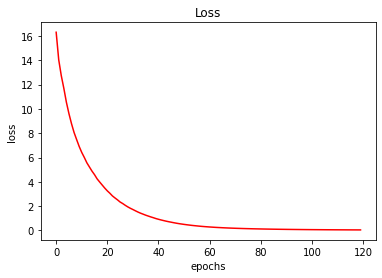

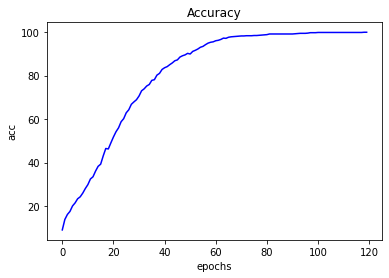

In [16]:
N, F, C, batch_size, epochs = 1000, 300, 10, 125, 120
dataset = RandomDataset(N,F,C)
model = FFNN(F, [500], [relu], C)
optimizer = SGD(model.parameters(), lr=1e-1)

with torch.no_grad():
  loss, acc = entrenar_FFNN(model, dataset, optimizer, epochs=epochs, batch_size=batch_size)

plot_results(loss, acc)

Epoch:200 Acc:99.98% Loss:0.0090 Tiempo/epoch:0.828s

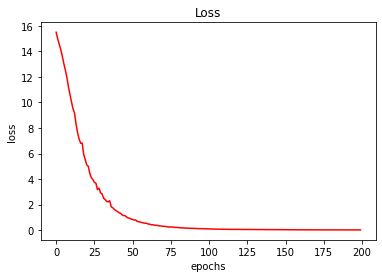

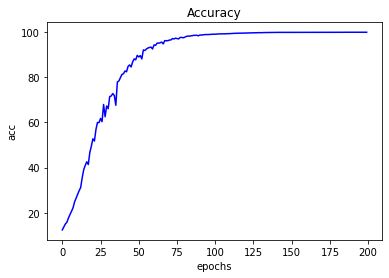

In [17]:
N, F, C, batch_size, epochs = 5000, 300, 10, 16, 200
dataset = RandomDataset(N,F,C)
model = FFNN(F, [500, 400, 300], [tanh, sig, relu], C)
optimizer = SGD(model.parameters(), lr=1e-3)

with torch.no_grad():
  loss1, acc1 = entrenar_FFNN(model, dataset, optimizer, epochs=epochs, batch_size=batch_size)

plot_results(loss1, acc1)

Epoch:100 Acc:97.65% Loss:0.2027 Tiempo/epoch:0.569s

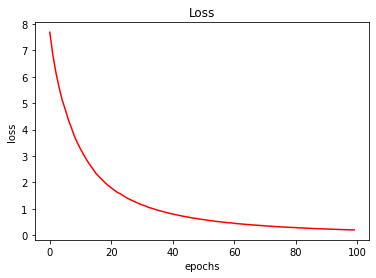

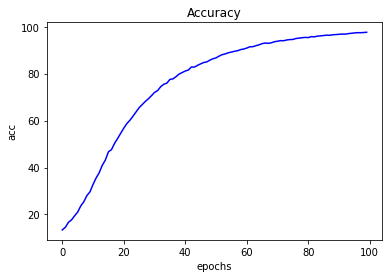

In [18]:
N, F, C, batch_size, epochs = 4000, 300, 10, 16, 100
model = FFNN(F, [500, 300], [tanh, sig], C)
optimizer = SGD(model.parameters(), lr=1e-2)
dataset = RandomDataset(N,F,C)

with torch.no_grad():
  loss2, acc2 = entrenar_FFNN(model, dataset, optimizer, epochs=epochs, batch_size=batch_size)

plot_results(loss2, acc2)

## 4e) Opcional: Optimizando tu red para MNIST

In [20]:
# Tu código de carga de datos, creación de la red, 
# entrenamiento/optimización y reportes acá